# Correlation

References:

* [Dimensionality Reduction in Python](https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-selection-i-selecting-for-feature-information)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/titantic-train.csv")
df = df[["Age", "Fare", "Survived"]]

df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


## Correlation Matrix

In [4]:
df.corr()

,Age,Fare,Survived
Age,1.000000,0.096067,-0.077221
Fare,0.096067,1.000000,0.257307
Survived,-0.077221,0.257307,1.000000


## Visualizing a Correlation Matrix

### Simple visualization

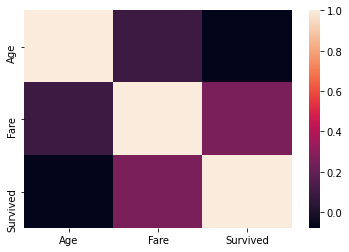

In [5]:
sns.heatmap(df.corr())
plt.show()

### Fancy visualization

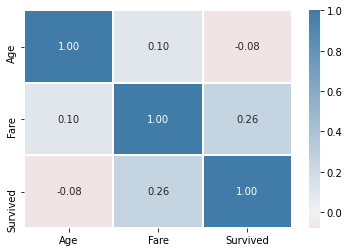

In [6]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

### Removing duplicate information

Correlation Matrix:


,Age,Fare,Survived
Age,1.000000,0.096067,-0.077221
Fare,0.096067,1.000000,0.257307
Survived,-0.077221,0.257307,1.000000



Matrix of true values with same shape:

 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

Mask where true values will not be shown:

 [[ True  True  True]
 [False  True  True]
 [False False  True]]


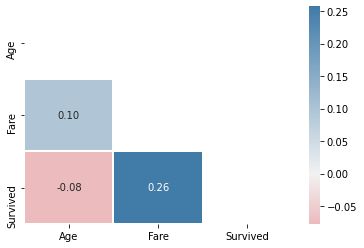

In [7]:
corr = df.corr()
print("Correlation Matrix:")
display(corr)

# np.ones_like: "Return an array of ones with the same shape and type as a given array."
#  dtype=bool causes it to return True values, otherwise it would be 1 (which would still work here)
ones_like = np.ones_like(corr, dtype=bool)
print("\nMatrix of true values with same shape:\n\n", ones_like)

# np.triu: "Return a copy of a matrix with the elements below the k-th diagonal zeroed."
mask = np.triu(ones_like)
print("\nMask where true values will not be shown:\n\n", mask)

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

# mask: "If passed, data will not be shown in cells where mask is True."
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

## Correlations of a single features

Correlation Matrix:


,Age,Fare,Survived
Age,1.000000,0.096067,-0.077221
Fare,0.096067,1.000000,0.257307
Survived,-0.077221,0.257307,1.000000



Absolute Values:


,Age,Fare,Survived
Age,1.000000,0.096067,0.077221
Fare,0.096067,1.000000,0.257307
Survived,0.077221,0.257307,1.000000



Unstacked:


Age       Age         1.000000
          Fare        0.096067
          Survived    0.077221
Fare      Age         0.096067
          Fare        1.000000
          Survived    0.257307
Survived  Age         0.077221
          Fare        0.257307
          Survived    1.000000
dtype: float64


Sorted Descending:


,level_0,level_1,0
0,Survived,Survived,1.000000
1,Fare,Fare,1.000000
2,Age,Age,1.000000
3,Survived,Fare,0.257307
4,Fare,Survived,0.257307
5,Fare,Age,0.096067
6,Age,Fare,0.096067
7,Survived,Age,0.077221
8,Age,Survived,0.077221



Renamed:


,Feature 1,Feature 2,Correlation
0,Survived,Survived,1.000000
1,Fare,Fare,1.000000
2,Age,Age,1.000000
3,Survived,Fare,0.257307
4,Fare,Survived,0.257307
5,Fare,Age,0.096067
6,Age,Fare,0.096067
7,Survived,Age,0.077221
8,Age,Survived,0.077221



Target Correlations Only:


,Feature 1,Feature 2,Correlation
3,Survived,Fare,0.257307
7,Survived,Age,0.077221


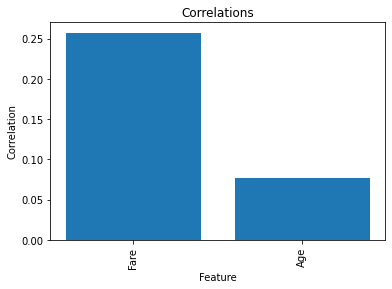

In [12]:
corr = df.corr()
print("Correlation Matrix:")
display(corr)

corr = corr.abs()
print("\nAbsolute Values:")
display(corr)

corr = corr.unstack()
print("\nUnstacked:")
display(corr)

corr = corr.sort_values(ascending=False).reset_index()
print("\nSorted Descending:")
display(corr)

corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"}, inplace=True)
print("\nRenamed:")
display(corr)

target = "Survived"
correlations = corr[corr["Feature 1"] == target]

# Don't want to include the correlation of 1 with itself
correlations = correlations[correlations["Feature 2"] != target]

print("\nTarget Correlations Only:")
display(correlations)

plt.bar(correlations["Feature 2"], correlations["Correlation"])
plt.title("Correlations")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()

## Removing columns that are highly correlated to other columns

In [9]:
corr = df.corr().abs()
print("Correlation Matrix Absolute Values:")
display(corr)

mask = np.triu(np.ones_like(corr, dtype=bool))
print("\nMask:")
display(mask)

# We want to avoid removing both features when two have a correlation
tri_df = corr.mask(mask)
print("\nCorrelation Matrix with Upper Triangle Masked:")
display(tri_df)

# In reality you wouldn't want to drop a column with only 20% correlation
# but using it here for demonstration purposes
to_drop = [column for column in tri_df.columns if any(tri_df[column] > 0.2)]
print("\nTo drop:", to_drop)

df_filtered = df.drop(to_drop, axis=1)
print("\nFiltered:")
display(df_filtered.head())

Correlation Matrix Absolute Values:


,Age,Fare,Survived
Age,1.000000,0.096067,0.077221
Fare,0.096067,1.000000,0.257307
Survived,0.077221,0.257307,1.000000



Mask:


array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])


Correlation Matrix with Upper Triangle Masked:


,Age,Fare,Survived
Age,NaN,NaN,NaN
Fare,0.096067,NaN,NaN
Survived,0.077221,0.257307,NaN



To drop: ['Fare']

Filtered:


,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
